# Created by : Rutu Shah
# Hands-On Assignment 4: Use Unsupervised Deep Learning Algorithm to Detect Fraud with PyOD
# Advance Artificial Intelligence (MSCS-633-A01)

In [27]:
# Fraud Detection using AutoEncoder (PyOD)

# Step 1: Install and Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pyod.models.auto_encoder import AutoEncoder
import tensorflow as tf

# Reduce TensorFlow logging
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"


In [29]:
#importing the fraud detecting using fraud-detector
import kagglehub

# Download latest version
path = kagglehub.dataset_download("whenamancodes/fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fraud-detection


In [30]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/whenamancodes/fraud-detection/versions/1"
print(os.listdir(dataset_path))


['creditcard.csv']


In [35]:
# Step 2: Load Dataset
df = pd.read_csv(os.path.join(dataset_path, 'creditcard.csv'))
df.head()
model_features = df.columns.drop('Class')
X = df[model_features]
y = df['Class']
# Step 3: Display Class Distribution
print("Class distribution:\n", y.value_counts())

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [38]:
clf.get_params().keys()


dict_keys(['batch_norm', 'batch_size', 'compile_mode', 'contamination', 'device', 'dropout_rate', 'epoch_num', 'hidden_activation_name', 'hidden_neuron_list', 'lr', 'optimizer_name', 'optimizer_params', 'preprocessing', 'random_state', 'use_compile', 'verbose'])

In [39]:
clf.set_params(hidden_neuron_list=[64, 32])


AutoEncoder(batch_norm=True, batch_size=32, compile_mode='default',
      contamination=0.5, device=device(type='cpu'), dropout_rate=0.2,
      epoch_num=10, hidden_activation_name='relu',
      hidden_neuron_list=[64, 32], lr=0.001, optimizer_name='adam',
      optimizer_params={'weight_decay': 1e-05}, preprocessing=True,
      random_state=42, use_compile=False, verbose=1)

In [40]:
#step 4 : Training the model
from pyod.models.auto_encoder import AutoEncoder

# Step 1: Instantiate model with supported parameters
clf = AutoEncoder(
    contamination=0.5,
    batch_size=32,
    verbose=1
)

# Step 2: Set training epochs using the correct parameter
clf.set_params(epoch_num=30)

# Step 3: Fit model
clf.fit(X)


Training: 100%|██████████| 30/30 [13:31<00:00, 27.05s/it]


In [41]:
# Step 5: Predict Outliers
outliers = clf.predict(X)
anomaly = np.where(outliers == 1)

In [42]:
# Step 6: Predict Specific Instance
sample = X.iloc[[4920]]
sample_pred = clf.predict(sample)
sample_conf = clf.predict_confidence(sample)

print("Sample Prediction:", sample_pred)
print("Prediction Confidence:", sample_conf)

Sample Prediction: [1]
Prediction Confidence: [1.]


In [43]:
# Step 7: Evaluate Model Output
y_pred = clf.labels_
y_scores = clf.decision_scores_

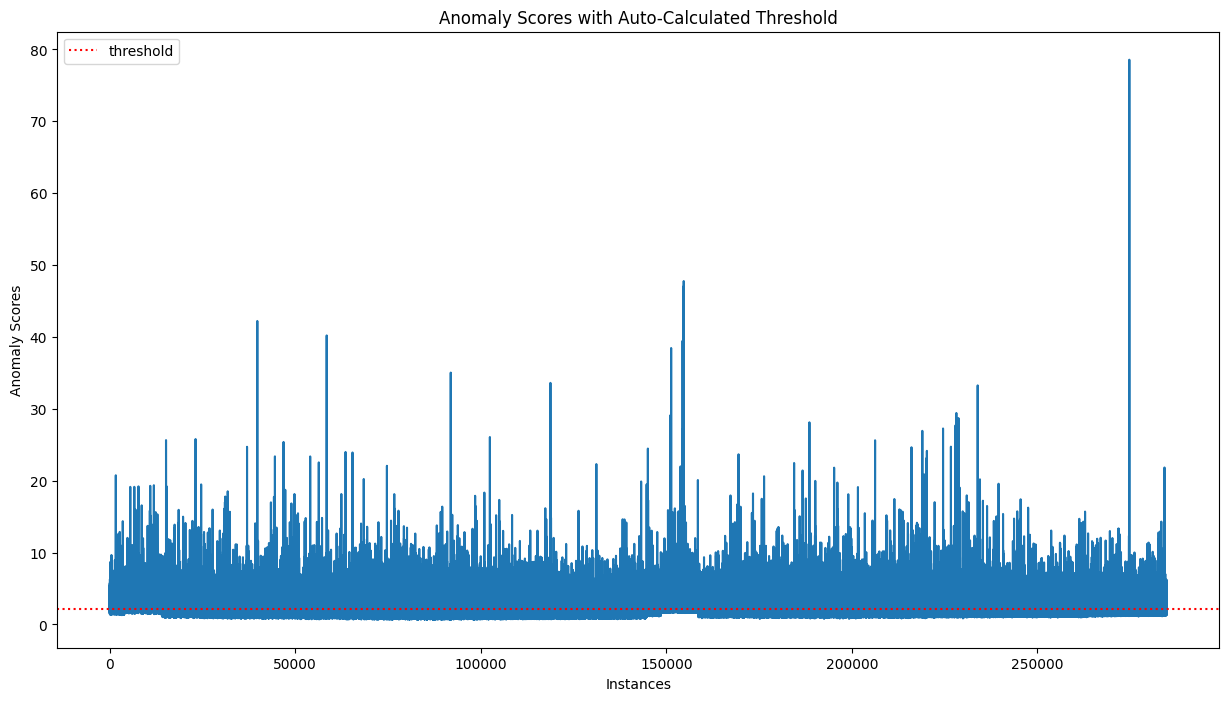

In [44]:
# Step 8: Visualize Anomaly Scores
plt.figure(figsize=(15, 8))
plt.plot(y_scores)
plt.axhline(y=clf.threshold_, c='r', ls='dotted', label='threshold')
plt.xlabel('Instances')
plt.ylabel('Anomaly Scores')
plt.title('Anomaly Scores with Auto-Calculated Threshold')
plt.legend()
plt.show()

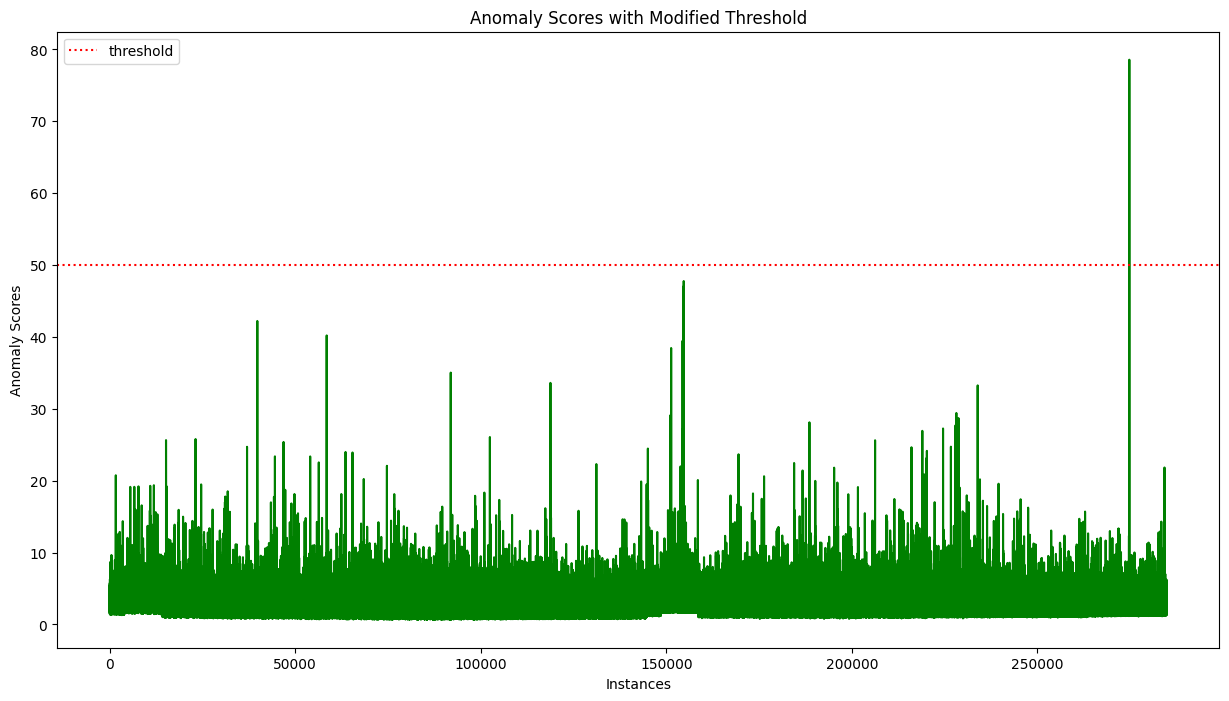

In [45]:
# Step 9: Modified Threshold Visualization
threshold = 50
plt.figure(figsize=(15, 8))
plt.plot(y_scores, color="green")
plt.axhline(y=threshold, c='r', ls='dotted', label='threshold')
plt.xlabel('Instances')
plt.ylabel('Anomaly Scores')
plt.title('Anomaly Scores with Modified Threshold')
plt.legend()
plt.show()

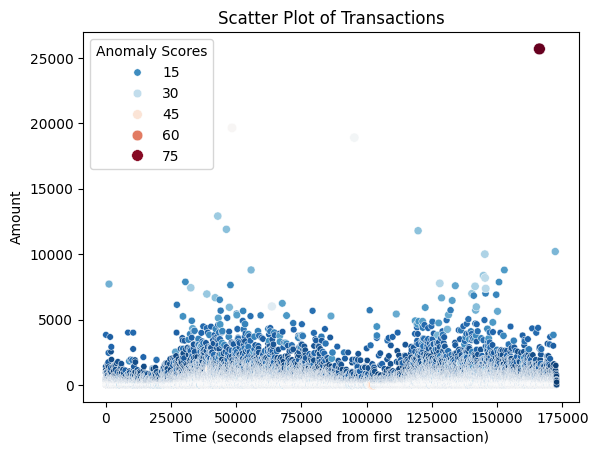

In [47]:
# Step 10: Scatter Plot Visualization
sns.scatterplot(x="Time", y="Amount", hue=y_scores, data=df, palette="RdBu_r", size=y_scores)
plt.xlabel('Time (seconds elapsed from first transaction)')
plt.ylabel('Amount')
plt.legend(title='Anomaly Scores')
plt.title('Scatter Plot of Transactions')
plt.show()